Text(0.5, 0.92, 'Atrator de Lorenz')

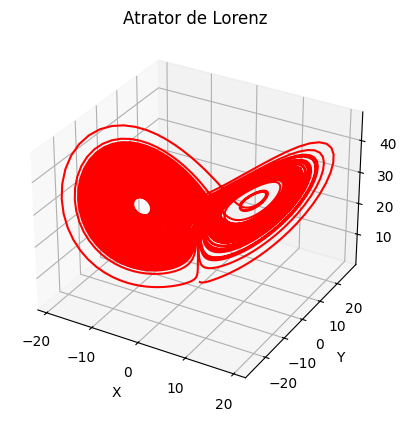

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_attractor(sigma, rho, beta, x0, y0, z0, h, num_steps):
    
    # Criamos np.arrays de modo a otimizar o uso de listas
    # Operações mais rápidas entre os vetores
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    z = np.zeros(num_steps)

    x[0], y[0], z[0] = x0, y0, z0

    for i in range(1, num_steps):
        k1_x = h * (sigma * (y[i-1] - x[i-1]))
        k1_y = h * (x[i-1] * (rho - z[i-1]) - y[i-1])
        k1_z = h * (x[i-1] * y[i-1] - beta * z[i-1])

        k2_x = h * (sigma * ((y[i-1] + 0.5 * k1_y) - (x[i-1] + 0.5 * k1_x)))
        k2_y = h * ((x[i-1] + 0.5 * k1_x) * (rho - (z[i-1] + 0.5 * k1_z)) - (y[i-1] + 0.5 * k1_y))
        k2_z = h * ((x[i-1] + 0.5 * k1_x) * (y[i-1] + 0.5 * k1_y) - beta * (z[i-1] + 0.5 * k1_z))

        k3_x = h * (sigma * ((y[i-1] + 0.5 * k2_y) - (x[i-1] + 0.5 * k2_x)))
        k3_y = h * ((x[i-1] + 0.5 * k2_x) * (rho - (z[i-1] + 0.5 * k2_z)) - (y[i-1] + 0.5 * k2_y))
        k3_z = h * ((x[i-1] + 0.5 * k2_x) * (y[i-1] + 0.5 * k2_y) - beta * (z[i-1] + 0.5 * k2_z))

        k4_x = h * (sigma * ((y[i-1] + k3_y) - (x[i-1] + k3_x)))
        k4_y = h * ((x[i-1] + k3_x) * (rho - (z[i-1] + k3_z)) - (y[i-1] + k3_y))
        k4_z = h * ((x[i-1] + k3_x) * (y[i-1] + k3_y) - beta * (z[i-1] + k3_z))

        x[i] = x[i-1] + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y[i] = y[i-1] + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        z[i] = z[i-1] + (1/6) * (k1_z + 2*k2_z + 2*k3_z + k4_z)

    return x, y, z

# Arbitrando valores usuais
sigma = 10
rho = 28
beta = 8/3
x0, y0, z0 = 0.000001, 1.000001, 1.050001
h = 0.01
num_steps = 10000

x, y, z = lorenz_attractor(sigma, rho, beta, x0, y0, z0, h, num_steps)

# Guardando os dados em um dataset
import pandas as pd
df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})


## Gráfico com plot RK, mexer em num_steps

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='r') 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Atrator de Lorenz')

# plt.show()

In [5]:
display(df)

X         Y          Z
0     0.000001  1.000001   1.050001
1     0.095106  1.003040   1.022850
2     0.182650  1.030513   0.997334
3     0.265582  1.080597   0.973429
4     0.346437  1.152212   0.951188
...        ...       ...        ...
9995  7.460754  5.572379  28.206099
9996  7.278033  5.514199  27.866750
9997  7.108387  5.481108  27.523461
9998  6.952902  5.471925  27.178928
9999  6.812447  5.485443  26.835621

[10000 rows x 3 columns]

In [6]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import CubicSpline

# Criando splines cúbicas para os pontos (x, y, z)
spline_x = CubicSpline(df.index, df['X'])
spline_y = CubicSpline(df.index, df['Y'])
spline_z = CubicSpline(df.index, df['Z'])

fig = go.Figure()

# Dataset original
fig.add_trace(go.Scatter(x=df.index, y=df['X'], mode='markers', name='X', marker=dict(size=5)))
fig.add_trace(go.Scatter(x=df.index, y=df['Y'], mode='markers', name='Y', marker=dict(size=5)))
fig.add_trace(go.Scatter(x=df.index, y=df['Z'], mode='markers', name='Z', marker=dict(size=5)))

# trajetórias das splines cúbicas
fig.add_trace(go.Scatter(x=df.index, y=spline_x(df['X']), mode='lines', name='X_spline'))
fig.add_trace(go.Scatter(x=df.index, y=spline_y(df['Y']), mode='lines', name='Y_spline'))
fig.add_trace(go.Scatter(x=df.index, y=spline_z(df['Z']), mode='lines', name='Z_spline'))

fig.update_layout(
    title='Atrator de Lorenz - Visão Spline Cúbica',
    xaxis_title='t',
    yaxis_title='P(t)',
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='black'
        ),
        bgcolor='white',
        bordercolor='Black',
        borderwidth=2
    ),
    xaxis=dict(showgrid=True, gridcolor='LightGrey'),
    yaxis=dict(showgrid=True, gridcolor='LightGrey')
)

fig.show()

In [7]:
import numpy as np

# Definição do dataset em cada eixo
x = np.array(df.index)
y = np.array(df['X'])
z = np.array(df['Y'])

# coeficientes dos polinômios interpoladores usando MMQ
coeffs_x = np.polyfit(x, y, 3)
coeffs_y = np.polyfit(x, z, 3)
coeffs_z = np.polyfit(x, df['Z'], 3)

print(f'p(x) = {coeffs_x[0]}x^3 + {coeffs_x[1]}x^2 + {coeffs_x[2]}x + {coeffs_x[3]}\n')
print(f'p(y) = {coeffs_y[0]}x^3 + {coeffs_y[1]}x^2 + {coeffs_y[2]}x + {coeffs_y[3]}\n')
print(f'p(z) = {coeffs_z[0]}x^3 + {coeffs_z[1]}x^2 + {coeffs_z[2]}x + {coeffs_z[3]}')


p(x) = 3.285062250516336e-11x^3 + -6.207768753207544e-07x^2 + 0.004109636764094192x + -9.15710637438465

p(y) = 3.4690816768548336e-11x^3 + -6.489131829144576e-07x^2 + 0.004230706965611597x + -9.277818785242804

p(z) = -1.222989937358565e-11x^3 + 2.3357395654976872e-07x^2 + -0.0014627061505792065x + 26.292588222866133


In [8]:
import numpy as np
import plotly.graph_objects as go

x_vals = np.linspace(df.index.min(), df.index.max(), 1000)

fig = go.Figure()

# Dataset Original
fig.add_trace(go.Scatter(x=df.index, y=df['X'], mode='markers', name='X', marker=dict(size=5)))
fig.add_trace(go.Scatter(x=df.index, y=df['Y'], mode='markers', name='Y', marker=dict(size=5)))
fig.add_trace(go.Scatter(x=df.index, y=df['Z'], mode='markers', name='Z', marker=dict(size=5)))

# Trajetórias MMQ
fig.add_trace(go.Scatter(x=x_vals, y=np.polyval(coeffs_x, x_vals), mode='lines', name='X_MMQ'))
fig.add_trace(go.Scatter(x=x_vals, y=np.polyval(coeffs_y, x_vals), mode='lines', name='Y_MMQ'))
fig.add_trace(go.Scatter(x=x_vals, y=np.polyval(coeffs_z, x_vals), mode='lines', name='Z_MMQ'))

fig.update_layout(
    title='Atrator de Lorenz - Visão MMQ',
    xaxis_title='t',
    yaxis_title='P(t)',
    legend=dict(
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='black'
        ),
        bgcolor='white',
        bordercolor='Black',
        borderwidth=2
    ),
    xaxis=dict(showgrid=True, gridcolor='LightGrey'),
    yaxis=dict(showgrid=True, gridcolor='LightGrey')
)

fig.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Gerando as previsões para as splines cúbicas
y_pred_spline_x = spline_x(df['X'])
y_pred_spline_y = spline_y(df['Y'])
y_pred_spline_z = spline_z(df['Z'])

# Gerando as previsões para os polinômios interpoladores pelo MMQ
y_pred_mmq_x = np.polyval(coeffs_x, df.index)
y_pred_mmq_y = np.polyval(coeffs_y, df.index)
y_pred_mmq_z = np.polyval(coeffs_z, df.index)

# Calculando as métricas para as splines cúbicas
mae_spline_x = mean_absolute_error(df['X'], y_pred_spline_x)
mae_spline_y = mean_absolute_error(df['Y'], y_pred_spline_y)
mae_spline_z = mean_absolute_error(df['Z'], y_pred_spline_z)

rmse_spline_x = np.sqrt(mean_squared_error(df['X'], y_pred_spline_x))
rmse_spline_y = np.sqrt(mean_squared_error(df['Y'], y_pred_spline_y))
rmse_spline_z = np.sqrt(mean_squared_error(df['Z'], y_pred_spline_z))

evs_spline_x = explained_variance_score(df['X'], y_pred_spline_x)
evs_spline_y = explained_variance_score(df['Y'], y_pred_spline_y)
evs_spline_z = explained_variance_score(df['Z'], y_pred_spline_z)

# Calculando as métricas para os polinômios interpoladores pelo MMQ
mae_mmq_x = mean_absolute_error(df['X'], y_pred_mmq_x)
mae_mmq_y = mean_absolute_error(df['Y'], y_pred_mmq_y)
mae_mmq_z = mean_absolute_error(df['Z'], y_pred_mmq_z)

rmse_mmq_x = np.sqrt(mean_squared_error(df['X'], y_pred_mmq_x))
rmse_mmq_y = np.sqrt(mean_squared_error(df['Y'], y_pred_mmq_y))
rmse_mmq_z = np.sqrt(mean_squared_error(df['Z'], y_pred_mmq_z))

evs_mmq_x = explained_variance_score(df['X'], y_pred_mmq_x)
evs_mmq_y = explained_variance_score(df['Y'], y_pred_mmq_y)
evs_mmq_z = explained_variance_score(df['Z'], y_pred_mmq_z)

# Exibindo os resultados
print('Métricas para Splines Cúbicas:')
print(f'MAE X: {mae_spline_x:.4f}, RMSE X: {rmse_spline_x:.4f}, EVS X: {evs_spline_x:.4f}')
print(f'MAE Y: {mae_spline_y:.4f}, RMSE Y: {rmse_spline_y:.4f}, EVS Y: {evs_spline_y:.4f}')
print(f'MAE Z: {mae_spline_z:.4f}, RMSE Z: {rmse_spline_z:.4f}, EVS Z: {evs_spline_z:.4f}')

print('\nMétricas para MMQ:')
print(f'MAE X: {mae_mmq_x:.4f}, RMSE X: {rmse_mmq_x:.4f}, EVS X: {evs_mmq_x:.4f}')
print(f'MAE Y: {mae_mmq_y:.4f}, RMSE Y: {rmse_mmq_y:.4f}, EVS Y: {evs_mmq_y:.4f}')
print(f'MAE Z: {mae_mmq_z:.4f}, RMSE Z: {rmse_mmq_z:.4f}, EVS Z: {evs_mmq_z:.4f}')


Métricas para Splines Cúbicas:
MAE X: 5.5368, RMSE X: 6.6225, EVS X: 0.3009
MAE Y: 7.6583, RMSE Y: 10.1391, EVS Y: -0.1461
MAE Z: 17.0425, RMSE Z: 17.9019, EVS Z: 0.5646

Métricas para MMQ:
MAE X: 5.6865, RMSE X: 7.4046, EVS X: 0.1195
MAE Y: 6.2322, RMSE Y: 8.5051, EVS Y: 0.0947
MAE Z: 7.0116, RMSE Z: 8.4875, EVS Z: 0.0086
